In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv(r"C:\Users\shubhamst.tiwari\Documents\Personal Codes\Caltech - Projects\Marketing Project for DS\1717148238_marketing_data\marketing_data.csv")

# Check the first few rows to verify data import
print(df.head())

# Check if Dt_Customer and Income columns are loaded correctly
print(df[['Dt_Customer', 'Income']].info())


      ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  $84,835         0         0   
1      1        1961  Graduation         Single  $57,091         0         0   
2  10476        1958  Graduation        Married  $67,267         0         1   
3   1386        1967  Graduation       Together  $32,474         1         1   
4   5371        1989  Graduation         Single  $21,474         1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0   6/16/2014        0       189  ...                  6                  1   
1   6/15/2014        0       464  ...                  7                  5   
2   5/13/2014        0       134  ...                  5                  2   
3   5/11/2014        0        10  ...                  2                  7   
4    4/8/2014        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5 

In [32]:
# Rename columns to remove any extra spaces
df.columns = df.columns.str.strip()

# Alternatively, if the 'Income' column has a different name (e.g., 'Annual_Income'), rename it:
df.rename(columns={'Annual_Income': 'Income'}, inplace=True)

# Now check for missing values in Income
missing_income = df['Income'].isnull().sum()
print(f"Missing Income Values: {missing_income}")


Missing Income Values: 24


In [36]:
# Create total number of children variable
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Create age variable from birth year
df['Age'] = 2024 - df['Year_Birth']

# Create total spending variable (Sum of expenditure across various products)
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Derive total purchases from the number of transactions
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)


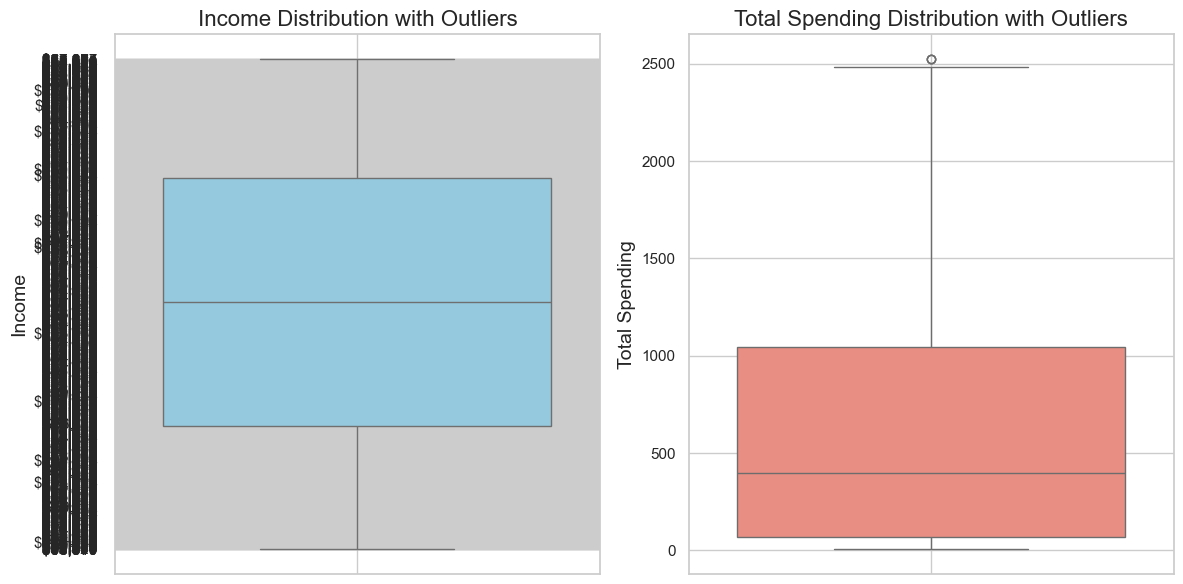

<Figure size 1200x800 with 0 Axes>

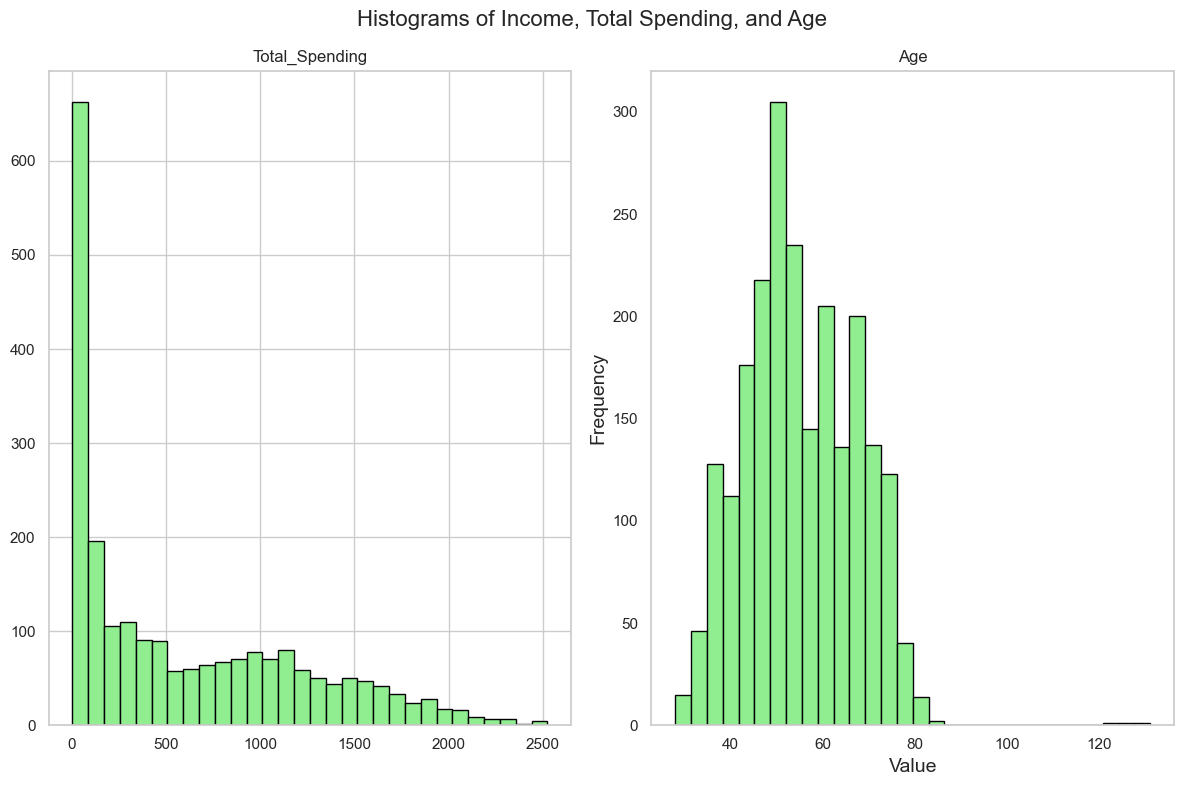

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Generate box plots for income and total spending
plt.figure(figsize=(12, 6))

# Box plot for Income
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(data=df, y='Income', color='skyblue')
plt.title('Income Distribution with Outliers', fontsize=16)
plt.ylabel('Income', fontsize=14)
plt.grid(True)

# Box plot for Total Spending
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(data=df, y='Total_Spending', color='salmon')
plt.title('Total Spending Distribution with Outliers', fontsize=16)
plt.ylabel('Total Spending', fontsize=14)
plt.grid(True)

plt.tight_layout()  # Adjusts the layout
plt.show()

# Generate histograms for visual insights
plt.figure(figsize=(12, 8))
df[['Income', 'Total_Spending', 'Age']].hist(bins=30, figsize=(12, 8), color='lightgreen', edgecolor='black')
plt.suptitle('Histograms of Income, Total Spending, and Age', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)  # Disable grid for histograms
plt.tight_layout()  # Adjusts the layout
plt.show()

# Handle outliers (Optional)
df = df[df['Income'] < df['Income'].quantile(0.99)]  # Remove top 1% outliers
df = df[df['Total_Spending'] < df['Total_Spending'].quantile(0.99)]

In [58]:
# Check column names first
print(df.columns)

# If 'Country' and 'Marital_Status' have leading/trailing spaces, strip them
df.columns = df.columns.str.strip()

# Now, recheck the column names
print(df.columns)

# Apply ordinal encoding for 'Education'
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
df['Education_Encoded'] = ordinal_enc.fit_transform(df[['Education']])

# One-hot encoding for 'Country' and 'Marital_Status'
# Make sure the columns exist after stripping
if 'Country' in df.columns and 'Marital_Status' in df.columns:
    df = pd.get_dummies(df, columns=['Country', 'Marital_Status'], drop_first=True)
else:
    print("Error: 'Country' or 'Marital_Status' not found in the columns")

# Verify the transformed DataFrame
print(df.head())

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Total_Children', 'Age', 'Total_Spending',
       'Total_Purchases', 'Education_Encoded', 'Country_CA', 'Country_GER',
       'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')
Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruit

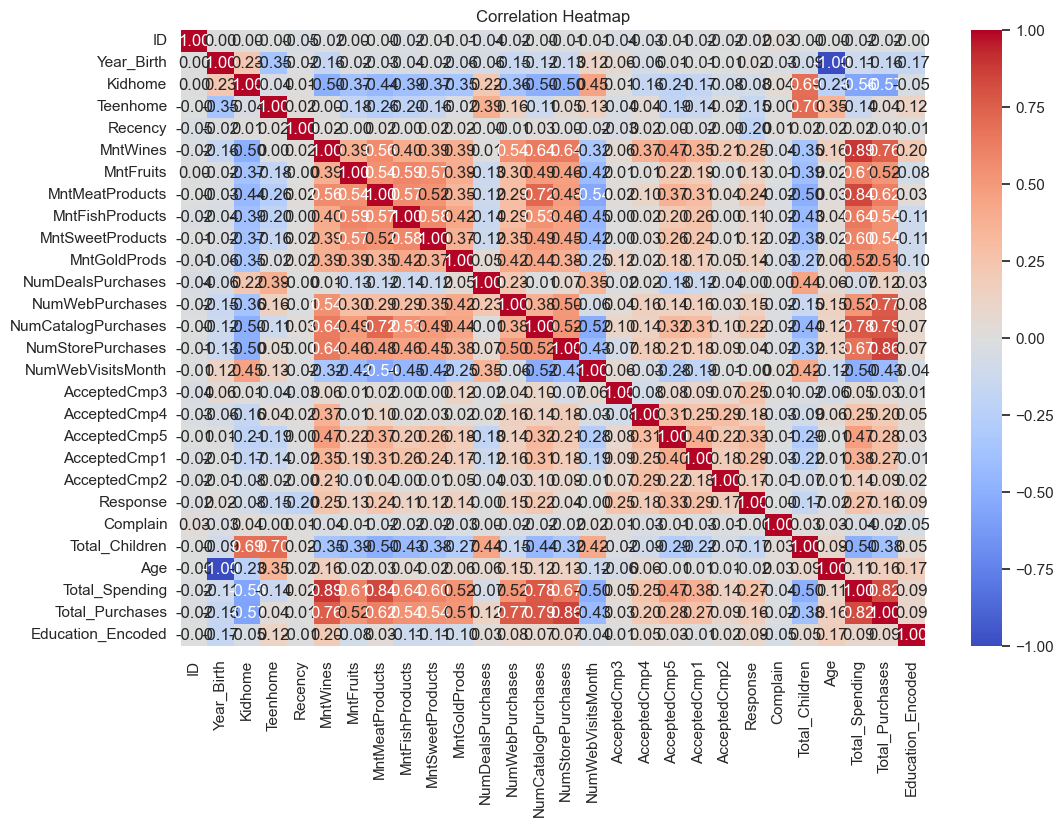

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate a heatmap to visualize correlation
plt.figure(figsize=(12,8))
corr = numeric_df.corr()  # Compute the correlation matrix for numeric data
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # fmt=".2f" formats correlation to 2 decimal points
plt.title('Correlation Heatmap')
plt.show()



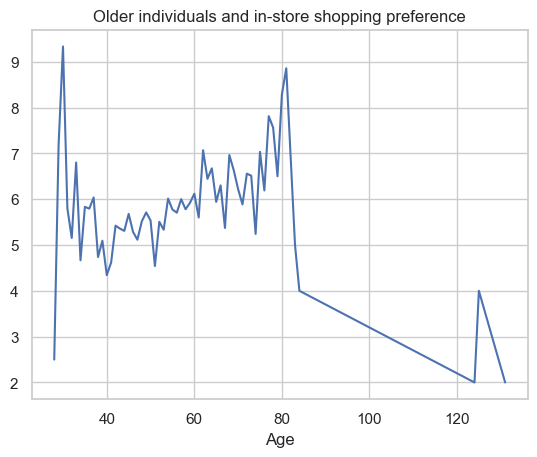

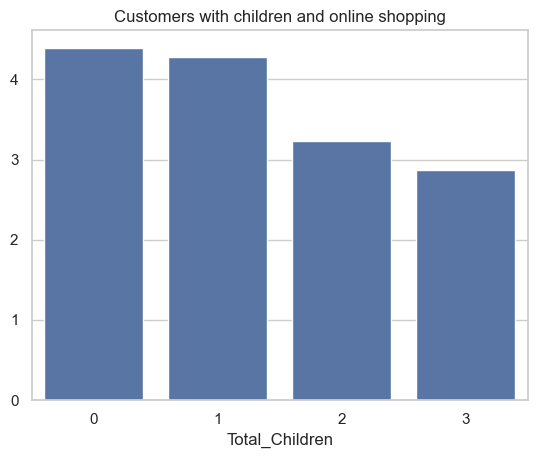

KeyError: 'Country_USA'

In [62]:
import scipy.stats as stats

# Hypothesis a: Older individuals and in-store shopping preference
age_groups = df.groupby('Age')['NumStorePurchases'].mean()
sns.lineplot(x=age_groups.index, y=age_groups.values)
plt.title("Older individuals and in-store shopping preference")
plt.show()

# Hypothesis b: Customers with children and online shopping preference
children_groups = df.groupby('Total_Children')['NumWebPurchases'].mean()
sns.barplot(x=children_groups.index, y=children_groups.values)
plt.title("Customers with children and online shopping")
plt.show()

# Hypothesis d: Does the US outperform the rest of the world?
us_sales = df[df['Country_USA'] == 1]['Total_Purchases'].mean()
rest_sales = df[df['Country_USA'] == 0]['Total_Purchases'].mean()
t_stat, p_val = stats.ttest_ind(df[df['Country_USA'] == 1]['Total_Purchases'],
                                df[df['Country_USA'] == 0]['Total_Purchases'])
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


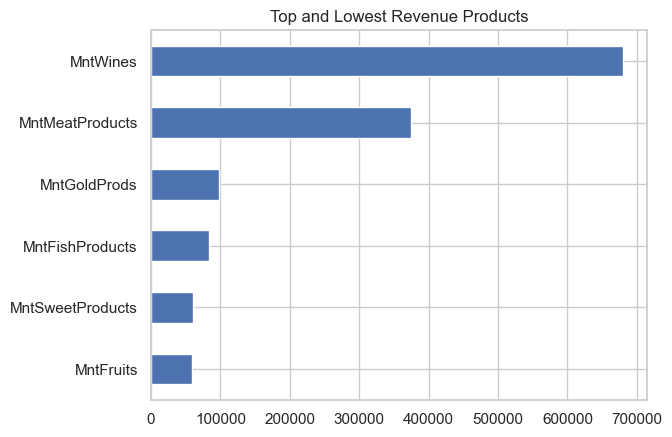

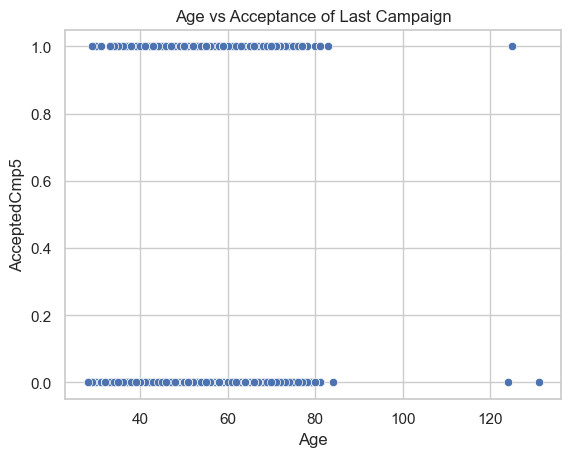

KeyError: 'Country'

In [64]:
# Top-performing and lowest revenue products
product_spending = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
product_spending.sort_values().plot(kind='barh', title='Top and Lowest Revenue Products')
plt.show()

# Correlation between age and campaign acceptance
sns.scatterplot(x=df['Age'], y=df['AcceptedCmp5'])
plt.title('Age vs Acceptance of Last Campaign')
plt.show()

# Country with the highest acceptance of last campaign
country_campaign = df.groupby('Country')['AcceptedCmp5'].sum().sort_values(ascending=False)
sns.barplot(x=country_campaign.index, y=country_campaign.values)
plt.title('Country with Highest Acceptance of Last Campaign')
plt.show()

# Total expenditure vs number of children
sns.scatterplot(x=df['Total_Children'], y=df['Total_Spending'])
plt.title('Number of Children vs Total Expenditure')
plt.show()

# Educational background of customers who complained in the last 2 years
complaints_education = df[df['Complain'] == 1]['Education'].value_counts()
complaints_education.plot(kind='bar', title='Educational Background of Complaints')
plt.show()
